<a href="https://colab.research.google.com/github/KeqingW44448/api/blob/main/RSM8421/Assignments/Assignment%20One/Problem_5_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview
This assignment consists of several exercises focused on **debugging neural networks**. Each network provided contains at least one issue. Your task is to identify the problem, explain your reasoning, and apply the appropriate debugging techniques you have learned in class to resolve it.

In [ ]:
from tensorflow import keras
import numpy as np
import seaborn as sns

from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

## Exercise 5

Let's explore the effect of **regularization** by fitting a simple linear model.

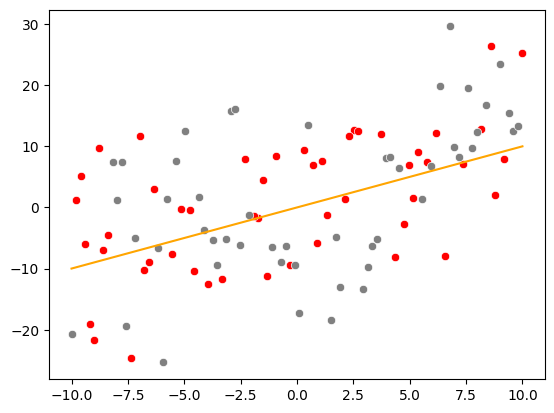

In [ ]:
np.random.seed(0)
x = np.linspace(-10, 10, 100)
np.random.shuffle(x)
y = x + np.random.normal(0, 10, size=[100])

sample = 50 # Overfitting is the structure, complexity of the model structure, sample size is a relevant comparision, take the large language as example, the natural datasize is more valuable as the datasize as large enough
x_train, y_train = x[:sample], y[:sample]
x_test, y_test = x[sample:], y[sample:]

scalar = StandardScaler()
x_train2 = scalar.fit_transform(x_train.reshape(len(x_train), 1))
x_test2 = scalar.transform(x_test.reshape(len(x_test), 1))

sns.scatterplot(x=x_train, y=y_train, color='red')
sns.scatterplot(x=x_test, y=y_test, color='grey')
sns.lineplot(x=x, y=x, color='orange');

We can see that our training points (shown in red) are highly biased due to the small sample size.

In [ ]:
print("Training Dataset Size: ", x_train2.shape)
print("Training Labels Size: ", y_train.shape)
print("Testing Dataset Size: ", x_test2.shape)
print("Testing Labels Size: ", y_test.shape)

model1 = Sequential()
model1.add(Input(shape=(1,)))
model1.add(Dense(15, activation="relu"))
model1.add(Dense(15, activation="relu"))
model1.add(Dense(1))

model1.summary()

Training Dataset Size:  (50, 1)
Training Labels Size:  (50,)
Testing Dataset Size:  (50, 1)
Testing Labels Size:  (50,)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 15)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286 (1.12 KB)

 Trainable params: 286 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss='mae', optimizer=Adam(learning_rate=0.01))
callbacks = []
history = model1.fit(x_train2, y_train, batch_size=5, epochs=50, callbacks=callbacks, verbose=0)

In [ ]:
model1.evaluate(x_test2, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 8.4919 


8.742966651916504

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step


<Axes: >

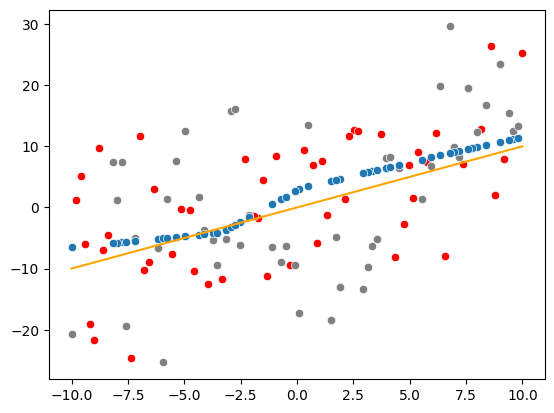

In [ ]:
y_predict = model1.predict(x_test2)

sns.scatterplot(x=x_train, y=y_train, color='red')
sns.scatterplot(x=x_test, y=y_test, color='grey')
sns.lineplot(x=x, y=x, color='orange')
sns.scatterplot(x=x_test, y=y_predict.reshape(len(y_predict)))

## Problem 5

The network's generalization is poor because we have so few data points. Let's experiment with **regularization** (see [Keras regularizers](https://keras.io/api/layers/regularizers/)) by trying each of the following separately:

a. Add `keras.regularizers.l2` using the `kernel_regularizer` and `bias_regularizer` parameters in the `Dense` layer.  
   - What effect does this have on the predicted output?  
   - How does changing $\alpha$ influence the results?  

b. Add a `Dropout` layer.  
   - What effect does adjusting $p$ have?  

c. Increase the `sample` variable from `5` to a larger number.  
   - What effect does this change have?

## Add keras.regularizers.l2 using the kernel_regularizer and bias_regularizer parameters in the Dense layer.

In [ ]:

from keras.regularizers import l2

model1 = Sequential()
model1.add(Input(shape=(1,)))
model1.add(Dense(15, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(Dense(15, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(Dense(1))


##Add Dropout

In [ ]:
from keras.layers import Dropout

model1 = Sequential()
model1.add(Input(shape=(1,)))
model1.add(Dense(15, activation="relu"))
model1.add(Dropout(0.3))  # p = 0.3
model1.add(Dense(15, activation="relu"))
model1.add(Dropout(0.3))
model1.add(Dense(1))

##  Increase the sample variable from 5 to a larger number.

In [ ]:
sample = 50